In [101]:
#In this notebook we are going to use SVM to predict which repair tools could have generated a specific commit.

In [92]:
# necesseray imports

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [93]:
# Read the data
# This is DRR features manually selected to reduce the computation complexityn.
# This a link to the features: https://github.com/SpoonLabs/coming-experiments/tree/master/out_features_d4j

data=pd.read_csv("/Users/macbook/PycharmProjects/ML/megadiff-correct.csv")
print("shape of the data sate is: ",data.shape)
print("We have 70 features for each of the 75 DRR data points")
print("Below wee can see how many data points of each tool we had")
print(data['tool'].value_counts())

shape of the data sate is:  (75, 70)
We have 70 features for each of the 75 DRR data points
Below wee can see how many data points of each tool we had
jaid          18
arja          12
SimFix        11
ACS           10
nopol          4
elixir         4
DeepRepair     4
SequenceR      4
ssFix          3
SketchFix      2
CapGen         2
genprog        1
Name: tool, dtype: int64


In [94]:
Dir="/Users/macbook/Documents/university/internship/MachineLearningOnComingData/"

In [95]:
tools_list=data['tool'].unique()
dummy=pd.get_dummies(data['tool'])

X = data.drop('tool', axis=1,inplace=True)
X = data.drop('file_name', axis=1)

In [96]:
print(tools_list)

['ACS' 'arja' 'CapGen' 'DeepRepair' 'elixir' 'genprog' 'jaid' 'nopol'
 'SequenceR' 'SimFix' 'SketchFix' 'ssFix']


In [97]:
# Tools are studied seperately to make it easier to review the graphs

Cohens kappa: 0.634146
ROC AUC: 0.928571
Accuracy: 0.933333
Precision: 0.500000
Recall: 1.000000
F1 score: 0.666667


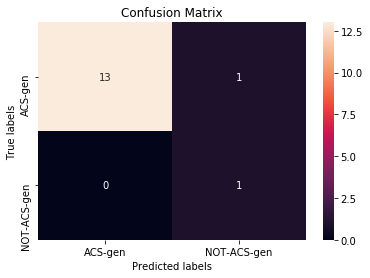

In [107]:
    tool="ACS"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
    
    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['ACS-gen','NOT-ACS-gen']); ax.yaxis.set_ticklabels(['ACS-gen' , 'NOT-ACS-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)

Cohens kappa: 0.423077
ROC AUC: 0.269231
Accuracy: 0.866667
Precision: 0.500000
Recall: 0.500000
F1 score: 0.500000


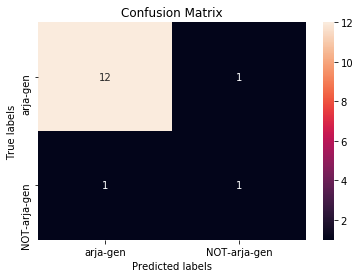

In [108]:
    tool="arja"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)
    
#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pre

    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['arja-gen','NOT-arja-gen']); ax.yaxis.set_ticklabels(['arja-gen' , 'NOT-arja-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)

Cohens kappa: 0.000000
CapGen label is not good
Accuracy: 0.933333
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/Users/macbook/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/macbook/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


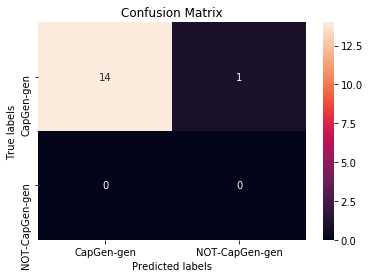

In [143]:
    tool="CapGen"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20000)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['CapGen-gen','NOT-CapGen-gen']); ax.yaxis.set_ticklabels(['CapGen-gen' , 'NOT-CapGen-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
#     auc = roc_auc_score(y_test, y_prob[:,0])
#     print('ROC AUC: %f' % auc)
    print("CapGen label is not good")
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)
    

Cohens kappa: 0.634146
ROC AUC: 0.384615
Accuracy: 0.933333
Precision: 1.000000
Recall: 0.500000
F1 score: 0.666667


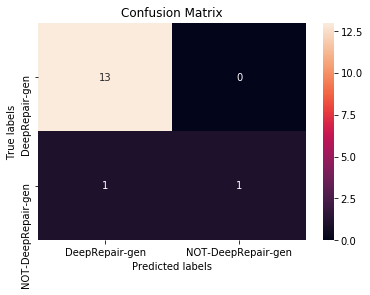

In [115]:
    tool="DeepRepair"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['DeepRepair-gen','NOT-DeepRepair-gen']); ax.yaxis.set_ticklabels(['DeepRepair-gen' , 'NOT-DeepRepair-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)
    

Cohens kappa: 0.285714
ROC AUC: 0.500000
Accuracy: 0.800000
Precision: 0.333333
Recall: 0.500000
F1 score: 0.400000


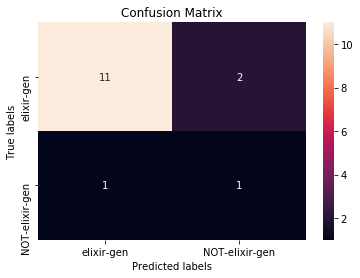

In [117]:
    tool="elixir"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=11)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['elixir-gen','NOT-elixir-gen']); ax.yaxis.set_ticklabels(['elixir-gen' , 'NOT-elixir-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)
    

In [141]:
    tool="genprog"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['genprog-gen','NOT-genprog-gen']); ax.yaxis.set_ticklabels(['genprog-gen' , 'NOT-genprog-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
#     auc = roc_auc_score(y_test, y_prob[:,0])
#     print('ROC AUC: %f' % auc)
    print("genprog label is not good")
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)

ValueError: The number of classes has to be greater than one; got 1 class

Cohens kappa: -0.105263
ROC AUC: 0.500000
Accuracy: 0.533333
Precision: 0.250000
Recall: 0.200000
F1 score: 0.222222


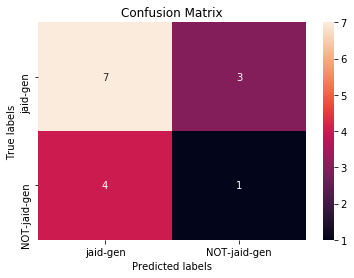

In [122]:
    tool="jaid"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)
#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['jaid-gen','NOT-jaid-gen']); ax.yaxis.set_ticklabels(['jaid-gen' , 'NOT-jaid-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)

Cohens kappa: 0.634146
ROC AUC: 0.961538
Accuracy: 0.933333
Precision: 1.000000
Recall: 0.500000
F1 score: 0.666667


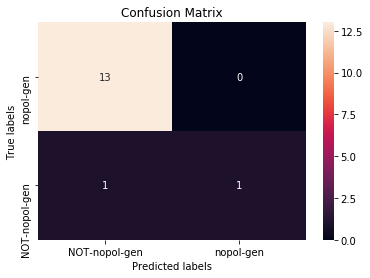

In [123]:
    tool="nopol"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NOT-nopol-gen','nopol-gen']); ax.yaxis.set_ticklabels(['nopol-gen' , 'NOT-nopol-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)

Cohens kappa: -0.111111
ROC AUC: 0.928571
Accuracy: 0.733333
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


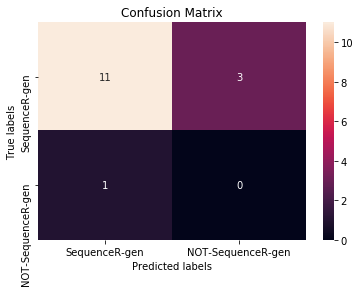

In [124]:
    tool="SequenceR"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)
    
#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['SequenceR-gen','NOT-SequenceR-gen']); ax.yaxis.set_ticklabels(['SequenceR-gen' , 'NOT-SequenceR-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)

Cohens kappa: -0.111111
ROC AUC: 1.000000
Accuracy: 0.733333
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


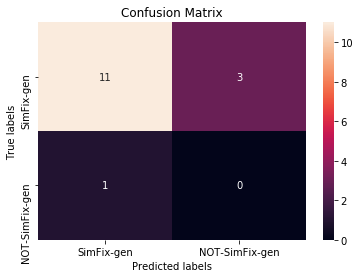

In [125]:
    tool="SimFix"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['SimFix-gen','NOT-SimFix-gen']); ax.yaxis.set_ticklabels(['SimFix-gen' , 'NOT-SimFix-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)
    

Cohens kappa: -0.071429
ROC AUC: 0.785714
Accuracy: 0.866667
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


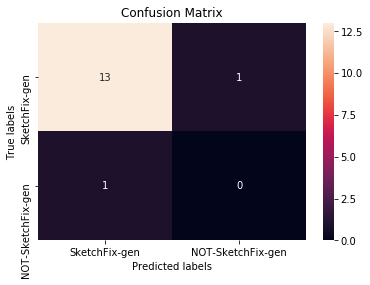

In [126]:
    tool="SketchFix"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['SketchFix-gen','NOT-SketchFix-gen']); ax.yaxis.set_ticklabels(['SketchFix-gen' , 'NOT-SketchFix-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)
    

Cohens kappa: -0.071429
ROC AUC: 0.285714
Accuracy: 0.866667
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


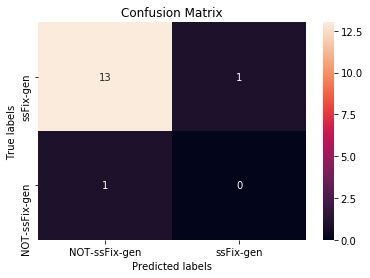

In [128]:
    tool="ssFix"
    y = dummy[tool]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

    svclassifier = SVC(kernel='linear')
    svclassifier.probability=True
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    y_prob = svclassifier.predict_proba(X_test)

#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NOT-ssFix-gen', 'ssFix-gen']); ax.yaxis.set_ticklabels(['ssFix-gen' , 'NOT-ssFix-gen']);
    
    kappa = cohen_kappa_score(y_test, y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, y_prob[:,0])
    print('ROC AUC: %f' % auc)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred)
    print('F1 score: %f' % f1)
    